<a href="https://colab.research.google.com/github/mertkarahan955/CENG463-HW/blob/hw1-mert/463_HW_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Loading and Exploratory Data Analysis


**1. Download and Load the Dataset**



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
#Task: Load the dataset
#load the data by the link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data = pd.read_csv(url, header=None)  # there is no column name in the dataset, thus we use "header=None"
#data.shape

In [3]:
#Data seperation problem checked
data = pd.read_csv(url, header=None, sep=",")
# define column names
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data.columns = columns


In [4]:
#Task:display the first few rows using data.head()
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [5]:
#replaces "?" with nan for finding null values in data
data = data.replace(["?", " "], np.nan)

In [6]:
#Task: Check for any missing values in the dataset.
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
#replaced nan values with column's mean to avoid future porblems
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())

In [8]:
data.dtypes #gerek olmayabilir konuşuruz

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [9]:
#checked null values again
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
data.head(10) #datayı değiştirdim diye yaptım gerek olmayabilir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [11]:
data.describe()
#buna gerek yok ben alışkanlıktan yaptım

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**2. Identify the Features and Target Variable**

In [12]:
#Task: Extract the features from the dataset
X = data.drop(columns=["num"])
#target column'ın adı num olarak geçiyor dataset tanımında ben o yüzden num olarak almıştım
#ama burda böyle güzel olmadı bilemedim.
#Task: Extract target variable from the dataset
Y = data["num"]

#Task: Print the names of all the feature columns and the target column.
print("Features (X):")
print(X.head())
print("\nTarget Variable (Y):")
print(Y.head())

Features (X):
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  
0    3.0  0.0   6.0  
1    2.0  3.0   3.0  
2    2.0  2.0   7.0  
3    3.0  0.0   3.0  
4    1.0  0.0   3.0  

Target Variable (Y):
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


In [13]:
#buraya hoca bi şey istememiş ama normalde bi heatmap falan yapılsa iyi olurdu ekleyelim mi bilemedim

# Task 2: Correlation Analysis

**1. Define the Pearson Correlation Function**

In [14]:
#Task: Implement this formula in a Python functin named pearson_correlation.
# The function should take two arrays, x and y, and return the Pearson correlation coefficient.

def pearson_correlation(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_sq = sum(x**2)
    sum_y_sq = sum(y**2)
    sum_xy = sum(x * y)

    # we calculated numerator and denominator seperately to avoid zero division error
    numerator = (n * sum_xy) - (sum_x * sum_y)
    denominator = ((n * sum_x_sq - sum_x**2) * (n * sum_y_sq - sum_y**2))**0.5
    # avoid zero division error
    if denominator == 0:
        return 0

    result = numerator / denominator
    return result




**2. Compute Correlations Between Each Feature and the Target**

In [15]:
#Task: Calculate correlations and store in a dictionary
correlations = {}
for column in X.columns:
    correlations[column] = pearson_correlation(X[column], Y)


**3. Filter Features Based on a Correlation Threshold**

In [16]:
#Task:Filter features based on a threshold value (given as 0.3)
threshold = 0.3
selected_features = {}
for feature, corr in correlations.items():
    if abs(corr) > threshold:
        selected_features[feature] = corr

#Task: Print the features with strong correlation
#We only want to consider features with an absolute correlation coefficient greater than 0.3.
print("\nFeatures with abs correlation > 0.3:")
for feature, corr in selected_features.items():
    print(f"{feature}: {corr:.2f}")


Features with abs correlation > 0.3:
cp: 0.41
thalach: -0.42
exang: 0.40
oldpeak: 0.50
slope: 0.38
ca: 0.52
thal: 0.51


**4. Find the Most Correlated Feature**

In [17]:
#Task: Find the most correlated feature
most_correlated_feature = max(selected_features, key=selected_features.get)
print(f"\nMost correlated feature: {most_correlated_feature} ({selected_features[most_correlated_feature]:.2f})")



Most correlated feature: ca (0.52)


In [18]:

#Task: Calculate correlations and store in a dictionary
correlations = {}
for column in X.columns:
    correlations[column] = pearson_correlation(X[column], Y)

#Task: Print all correlations
print("Correlations with target:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.5f}")

#Task:Filter features based on a threshold value (given as 0.3)
threshold = 0.3
selected_features = {}
for feature, corr in correlations.items():
    if abs(corr) > threshold:
        selected_features[feature] = corr

#Task: Print the features with strong correlation
#We only want to consider features with an absolute correlation coefficient greater than 0.3.
print("\nFeatures with abs correlation > 0.3:")
for feature, corr in selected_features.items():
    print(f"{feature}: {corr:.2f}")

#Task: Find the most correlated feature
most_correlated_feature = max(selected_features, key=selected_features.get)
print(f"\nMost correlated feature: {most_correlated_feature} ({selected_features[most_correlated_feature]:.2f})")


Correlations with target:
age: 0.22285
sex: 0.22447
cp: 0.40708
trestbps: 0.15775
chol: 0.07091
fbs: 0.05919
restecg: 0.18370
thalach: -0.41504
exang: 0.39706
oldpeak: 0.50409
slope: 0.37796
ca: 0.51739
thal: 0.50880

Features with abs correlation > 0.3:
cp: 0.41
thalach: -0.42
exang: 0.40
oldpeak: 0.50
slope: 0.38
ca: 0.52
thal: 0.51

Most correlated feature: ca (0.52)


# Task 3: Simple Linear Regression


In [19]:
def linear_regression(x, y):
    # Convert y to numeric, handling errors by coercing to NaN (error çıkıyordu gemini yaptı ???)
    X = pd.to_numeric(x, errors='coerce')
    Y = pd.to_numeric(y, errors='coerce')

    x_mean = X.mean()
    y_mean = Y.mean()

    # slope (b_1) calculations
    numerator = sum((X - x_mean) * (Y - y_mean))
    denominator = sum((X - x_mean) ** 2)

    # avoid zero division error (gereksiz ama zararı yok)
    if denominator == 0:
        return 0, 0
    b_1 = numerator / denominator

    #intercept (b_0) calculations
    b_0 = y_mean - (b_1 * x_mean)

    return b_0, b_1

In [20]:
#Task: Apply the function to the feature and target variables, obtaining the intercept and slope


b_0, b_1 = linear_regression(X['thal'], Y)  #error var diye gemini koydu buralar kontrol edilcek

#Task: Print the intercept and slope
print("Intercept (b0):", b_0)
print("Slope (b1):", b_1)


Intercept (b0): -0.5934023315864847
Slope (b1): 0.3233259749816042


In [21]:
#Task: using the coefficients predict y values for each input x
y_pred = b_0 + b_1 * X['thal']
print(y_pred)

#normalde mse calculate edilir ama hoca istememiş. sonra ekeriz belki

0      1.346554
1      0.376576
2      1.669879
3      0.376576
4      0.376576
         ...   
298    1.669879
299    1.669879
300    1.669879
301    0.376576
302    0.376576
Name: thal, Length: 303, dtype: float64


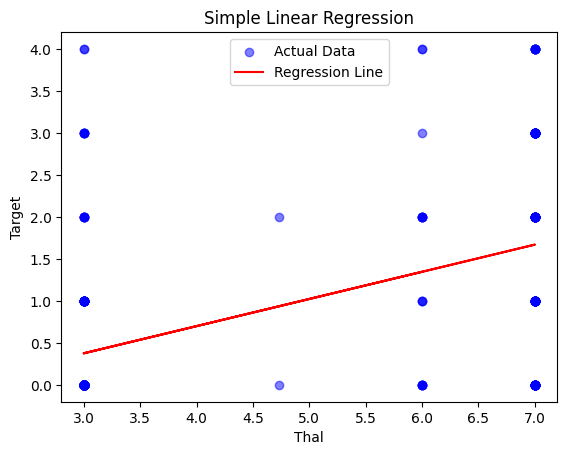

In [22]:
#Task: Visualize the results
plt.scatter(X['thal'], Y, color="blue", label="Actual Data", alpha=0.5)
plt.plot(X['thal'], y_pred, color="red", label="Regression Line")
plt.xlabel("Thal")
plt.ylabel("Target")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# Task 4: Multiple Linear Regression

In [23]:
# Task:  Create the Multiple Linear Regression Function:

def multiple_linear_regression(X, Y):
    # Ensure X is a 2D array and Y is a 1D array
    if X.ndim == 1:
        X = X.reshape(-1, 1)  # Reshape X to be 2D if it's a single feature

    # Add a column of ones to X for the intercept
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Apply the normal equation: β = (X^T X)^-1 X^T Y
    X_transpose = np.transpose(X)
    normal_coefficient_beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)

    return normal_coefficient_beta


In [28]:
# Task: Select futures with High Correlation



# Step 2: Sort features by absolute correlation and select the top 5
# Sort the dictionary items by absolute value of correlation in descending order

## get correalations dictionary from previous calculation
sorted_features = sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)

# Select the top 5 most correlated features
top_5_features = dict(sorted_features[:5])

# Step 3: Print the top 5 most correlated features
print("Top 5 most correlated features with the target:")
for feature, corr in top_5_features.items():
    print(f"{feature}: {corr:.2f}")

Top 5 most correlated features with the target:
ca: 0.52
thal: 0.51
oldpeak: 0.50
thalach: -0.42
cp: 0.41


In [26]:
# Task: Calculate Regression Coefficients

X_selected = X[top_5_features.keys()].values

beta = multiple_linear_regression(X_selected, Y)

print("Regression Coefficients for the selected features:", beta)

Regression Coefficients for the selected features: [-0.19032269  0.40214055  0.17029545  0.26188128 -0.00624192  0.22563477]


In [29]:
# Task Generate Predictions

def generate_predictions(X, beta):
    # Ensure X is a 2D array and Y is a 1D array
    if X.ndim == 1:
        X = X.reshape(-1, 1)  # Reshape X to be 2D if it's a single feature

    # Add a column of ones to X for the intercept
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))

    # Step 2: Calculate predictions using matrix multiplication
    y_pred = X_b.dot(beta)

    return y_pred

In [33]:
# Generate predictions using the selected features and calculated coefficients
predictions = generate_predictions(X_selected, beta)

# Display the predictions
print("Predicted target values:\n", predictions)

Predicted target values:
 [ 0.72312416  2.14821926  2.58424967  0.74681395  0.06485724 -0.12972303
  1.9714497   0.36279902  1.75549708  1.74861937  0.91493788  0.15726554
  1.18127142  0.37316335  0.79839985  0.33038444  0.66625422  0.53865354
  0.18221775 -0.13840586  0.11874867 -0.20311087  0.24451276  2.24109931
  2.51314767  0.43025511 -0.07614177  0.51551121  0.54855683  1.71646857
  0.87933634  2.0764927   0.01124507  1.03027654 -0.01508268  0.11204149
  1.80995771  1.59416371  1.79674958  0.40420661  2.66100893  0.48295278
  0.66967623  0.43649703  0.16821875  1.70557721  0.38684094  1.7862105
  0.62913255  0.36295411  0.12533167  1.13516868  0.67022997 -0.40164722
  1.77422283  2.20219496  1.22048661  0.91806165  0.58177776  0.53473313
  1.33218986  0.36539502  2.86915387 -0.06365794  1.96772227  2.55548101
  0.81561466  1.06774351  1.92081251  1.02267876  0.28316926  1.74350942
  2.56200217  1.70917606  0.52042396  0.26444351  2.15958238  0.90607821
 -0.29933563  1.42093679  

In [36]:
#Task Visualize Results
def plot_actual_vs_predicted(actual, predicted):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, alpha=0.6, edgecolor="k", label="Predicted values")
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2, label="Perfect prediction line")

    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()


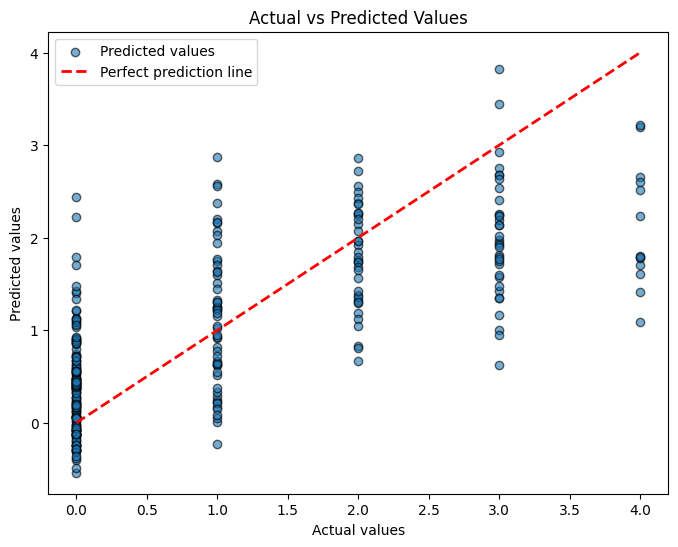

In [37]:

plot_actual_vs_predicted(Y, predictions)

In [39]:
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    return mse


In [40]:
# Calculate MSE for the multiple linear regression model
mse_multiple = mean_squared_error(Y, predictions)
print("Mean Squared Error (MSE) for multiple linear regression:", mse_multiple)

Mean Squared Error (MSE) for multiple linear regression: 0.6937290090826225


In [42]:
# Calculate MSE for the simple linear regression model
mse_simple = mean_squared_error(Y, y_pred)
print("Mean Squared Error (MSE) for simple linear regression:", mse_simple)


Mean Squared Error (MSE) for simple linear regression: 1.1148868401977414
